In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pylab as pl
%matplotlib inline

In [9]:
# Opening the files into dataFrames
LosAndes = pd.read_csv('/users/hnesman/Downloads/DATA_Science/LosAndes.csv')
LaNacion = pd.read_csv('/users/hnesman/Downloads/DATA_Science/LaNacion.csv')
LaVoz = pd.read_csv('/users/hnesman/Downloads/DATA_Science/LaVoz.csv')

152
1002
249


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11cf23b10>]], dtype=object)

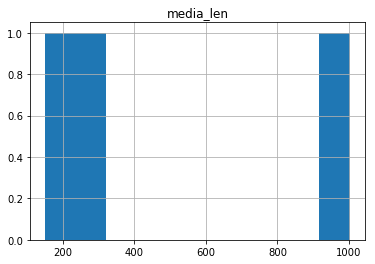

In [25]:
#Number of Articles per Newspaper
print len(LosAndes)
print len(LaNacion)
print len(LaVoz)


# Do a plot
media_len = [len(LosAndes),len(LaNacion), len(LaVoz)]
Newspaper = [str('LosAndes'),str('LaNacion'), str('LaVoz')]

df = pd.DataFrame({'media_len': media_len, 'Newspaper': Newspaper})
df.hist()
# I need to learn how to change the labels of the Histogram

In [6]:
# Concatenating the dataFrames, drop unused columns and set the name of the 'columns'
MediaNews = pd.concat([LosAndes,LaNacion])
MediaNews = pd.concat([LaVoz,MediaNews])
MediaNews = MediaNews.drop('Unnamed: 0',axis=1)
MediaNews.columns = ['Date', 'Title', 'Encabezado', 'Art_Label', 'Media']
len(MediaNews)

1403

In [7]:
# Inspection of the dataset and sorting
print type(MediaNews)
print MediaNews.columns
MediaNews = MediaNews.sort_values(by = ['Date','Art_Label'], axis = 0, ascending = True, inplace = False)
MediaNews.head()

<class 'pandas.core.frame.DataFrame'>
Index([u'Date', u'Title', u'Encabezado', u'Art_Label', u'Media'], dtype='object')


,Date,Title,Encabezado,Art_Label,Media
20,01/05/2017,chiqui tapia vamos a tener una afa que sea el...,chiqui tapia vamos a tener una afa que sea el...,Deportes,Los Andes
21,01/05/2017,cuando le pegue al arco y la pelota estaba po...,cuando le pegue al arco y la pelota estaba po...,Deportes,Los Andes
22,01/05/2017,estas igual aparecio un nuevo doble de leo me...,estas igual aparecio un nuevo doble de leo me...,Deportes,Los Andes
23,01/05/2017,trate de hacer lo mejor posible sintetizo el ...,trate de hacer lo mejor posible sintetizo el ...,Deportes,Los Andes
24,01/05/2017,arranco la esperada segunda temporada del futb...,arranco la esperada segunda temporada del futb...,Deportes,Los Andes


In [11]:
# Create the dictionary for unifying the values of 'Art_Label' and applying the funcion
cmap = {'deportiva': 'deportes', 'Deportes': 'deportes', 'econom\xc3\xada': 'economia', 'economia': 'economia',
        'Economia': 'economia', 'opini\xc3\xb3n': 'editorial', 'opinion': 'editorial',
        'editorial': 'editorial', 'politica': 'politica', 'Pol\xc3\xadtica': 'politica', 'pol\xc3\xadtica': 'politica', 'tecnolog\xc3\xada': 'otros', 'elcampo': 'otros', 'sucesos': 'policiales', 
        'seguridad': 'policiales', 'Policiales': 'policiales', 'mundo': 'elmundo', 'Mundo': 'elmundo', 'elmundo': 'elmundo', 'negocios': 'otros','ciudadanos': 'otros'}

MediaNews['Art_Label'] = MediaNews.Art_Label.apply(lambda x: cmap[str(x)])

In [13]:
# Save the file to .csv
MediaNews.to_csv('/users/hnesman/Downloads/DATA_Science/MediaNews.csv')

In [27]:
# Import the libraries for starting the Unsupervised Learning
from gensim.models.word2vec import Word2Vec
from gensim.matutils import Sparse2Corpus
from sklearn.feature_extraction.text import CountVectorizer

In [28]:
# Open the file into a dataFrame, clean a column "Unnamed: 0' that is created everytime I open the .csv file

data = pd.read_csv('/users/hnesman/Downloads/DATA_Science/MediaNews.csv', sep=',')
data = data.drop('Unnamed: 0', axis=1)
data.columns

Index([u'Date', u'Title', u'Encabezado', u'Art_Label', u'Media'], dtype='object')

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

politica      332
deportes      323
elmundo       192
otros         191
policiales    137
economia      132
editorial      96
Name: Art_Label, dtype: int64


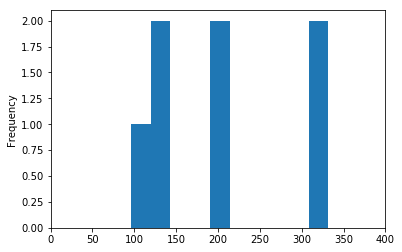

In [30]:
#I want to check how many articles for each Section and Media / Should do a Group By / I have problems with the labels

df2 = data['Art_Label'].value_counts()
df2.plot(kind = 'hist', xlim = (0,400))
print df2

## Now I have to prepare for doing the Word Vector routine

1) I will set up a list of STOP_WORDS in Spanish, I will feed this list after a couple of outcomes of the Vectorization

2) I do the CountVector, I will generate different combinations of 'NGrams', to identify any ambiguous context. 
    (i.e.: papa, is Pope, and Potatoe in Spanish), this risk is increased by the factor of 'casual' writing in Twitter.
 
3) Last stage, is a visual inspection of the n-NGrams lists created. I did it on Excel, I should explore an option in Python, those freq/words charts? IMPORTANT TO SOLVE

4) I cut a final list of terms, based on my expertise. (Otherwise machines would do everything)

In [88]:
# I set a list of STOP WORDS in Spanish
# coding: utf8
from __future__ import unicode_literals

STOP_WORDS = set(""" 100 20
none anos ano año años actualmente acuerdo adelante ademas además adrede afirmó agregó ahi ahora ahí
al algo alguna algunas alguno algunos algún alli allí alrededor ambos ampleamos
antano antaño ante anterior antes apenas aproximadamente aquel aquella aquellas
aquello aquellos aqui aquél aquélla aquéllas aquéllos aquí arriba arribaabajo
aseguró asi así atras aun aunque ayer añadió aún
bajo bastante bien breve buen buena buenas bueno buenos
cada casi cerca cierta ciertas cierto ciertos cinco claro comentó como con
conmigo conocer conseguimos conseguir considera consideró consigo consigue
consiguen consigues contigo contra cosas creo cual cuales cualquier cuando
cuanta cuantas cuanto cuantos cuatro cuenta cuál cuáles cuándo cuánta cuántas
cuánto cuántos cómo
da dado dan dar de debajo debe deben debido decir dejó del delante demasiado
demás dentro deprisa desde despacio despues después detras detrás dia dias dice
dicen dicho dieron diferente diferentes dijeron dijo dio donde dos durante día
días dónde
ejemplo el ella ellas ello ellos embargo empleais emplean emplear empleas
empleo en encima encuentra enfrente enseguida entonces entre era eramos eran
eras eres es esa esas ese eso esos esta estaba estaban estado estados estais
estamos estan estar estará estas este esto estos estoy estuvo está están ex
excepto existe existen explicó expresó él ésa ésas ése ésos ésta éstas éste
éstos
fin final fue fuera fueron fui fuimos
general gran grandes gueno
ha haber habia habla hablan habló habrá había habían hace haceis hacemos hacen hacer
hacerlo haces hacia haciendo hago han hasta hay haya he hecho hemos hicieron
hizo horas hoy hubo
igual incluso indicó informo informó intenta intentais intentamos intentan
intentar intentas intento ir
junto
la lado largo las le lejos les llegó lleva llevar lo los luego lugar
mal manera manifestó mas mayor me mediante medio mejor mencionó menos menudo mi
mia mias mientras mio mios mis misma mismas mismo mismos modo momento mucha
muchas mucho muchos muy más mí mía mías mío míos
nada nadie ni ninguna ningunas ninguno ningunos ningún no nos nosotras nosotros
nuestra nuestras nuestro nuestros nueva nuevas nuevo nuevos nunca
ocho os otra otras otro otros
pais para parece parte partir pasada pasado paìs peor pero pesar poca pocas
poco pocos podeis podemos poder podria podriais podriamos podrian podrias podrá
podrán podría podrían poner por porque posible primer primera primero primeros
principalmente pronto propia propias propio propios proximo próximo próximos
pudo pueda puede pueden puedo pues
qeu que quedó queremos quien quienes quiere quiza quizas quizá quizás quién quiénes qué
raras realizado realizar realizó repente respecto
sabe sabeis sabemos saben saber sabes salvo se sea sean segun segunda segundo
según seis ser sera será serán sería señaló si sido siempre siendo siete sigue
siguiente sin sino sobre sois sola solamente solas solo solos somos son soy
soyos su supuesto sus suya suyas suyo sé sí sólo
tal tambien también tampoco tan tanto tarde te temprano tendrá tendrán teneis
tenemos tener tenga tengo tenido tenía tercera ti tiempo tiene tienen toda
todas todavia todavía todo todos total trabaja trabajais trabajamos trabajan
trabajar trabajas trabajo tras trata través tres tu tus tuvo tuya tuyas tuyo
tuyos tú
ultimo un una unas uno unos usa usais usamos usan usar usas uso usted ustedes
última últimas último últimos
va vais valor vamos van varias varios vaya veces ver verdad verdadera verdadero
vez vosotras vosotros voy vuestra vuestras vuestro vuestros
ya yo
""".split())

In [166]:
# I create my Count Vectorizer in order to Tokenize the articles, I will create a couple CountVect for different
# values of ngram_range(): (1,3) - (2-3) - (3,3). With them I will create dataFrames and inspect which are the
# n-grams that I can use to search on Twitter.

for i in range(1,4):

    cv_i = CountVectorizer(binary = False, stop_words = STOP_WORDS, min_df = 3, ngram_range=(i, 3))

    docs_i = cv_i.fit_transform(data.Encabezado.dropna())
    id2word_i = dict(enumerate(cv_i.get_feature_names()))
    if i == 1:
        NGram_1 = pd.DataFrame({'index' : id2word_i.keys() , 'ngram' : unicode(id2word_i.values()) })
    elif i == 2:
        NGram_2 = pd.DataFrame({'index' : id2word_i.keys() , 'ngram' : unicode(id2word_i.values()) })
    else:
        NGram_3 = pd.DataFrame({'index' : id2word_i.keys() , 'ngram' : unicode(id2word_i.values()) })


In [167]:
# I copied the result of the CountVectorizer into .csv files so I can inspect by my own which 'tokens' I will
# use for the Twitter Search

NGram_1.to_csv('/users/hnesman/Downloads/DATA_Science/NGram_1.csv')
NGram_2.to_csv('/users/hnesman/Downloads/DATA_Science/NGram_2.csv')
NGram_3.to_csv('/users/hnesman/Downloads/DATA_Science/NGram_3.csv')

# I need techniques to analyze this list with Python, originally I did it with Excel